# WeatherPy
----

### Analysis: Trends
* Based on the data collected, there is a strong correlation between latitude and max temperatures recorded.
* Cities that have latitudes that are closer to 0 tend to have higher max temperatures. 
* Humidity has a weaker correlation to latitude, however cities closer to the equator tend to be more humid
* Cloudiness appears to not have a strong relationship to latitude, however, there are groupings at 0, 20, 79, and 90 percent

---

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from config import w_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a settings dictionary with info we're interested in
settings = {"units": "metric", "appid": w_key}

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather = owm.get_current(cities[0], **settings)
weather

{'coord': {'lon': -17.92, 'lat': 28.66},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 23,
  'pressure': 1020,
  'humidity': 69,
  'temp_min': 23,
  'temp_max': 23},
 'visibility': 10000,
 'wind': {'speed': 6.7, 'deg': 30},
 'clouds': {'all': 75},
 'dt': 1539799200,
 'sys': {'type': 1,
  'id': 5515,
  'message': 0.0105,
  'country': 'ES',
  'sunrise': 1539760447,
  'sunset': 1539801552},
 'id': 2514651,
 'name': 'Los Llanos de Aridane',
 'cod': 200}

In [5]:
# Get current weather and selected fields for each city and append to list
index = 1
single_city = []
for name in cities:
    print(f'Processing Record {index} of Set 1 | {name}')
    try:
        weather = owm.get_current(name, **settings)
    except Exception:
        print('City not found. Skipping...')
        next
    
    city_stats = {}
    city_stats['City'] = name
    try:  
        city_stats['Cloudiness'] = weather.get('clouds').get('all')
    except Exception:
        pass
    try:
        city_stats['Country'] = weather.get('sys').get('country')
    except Exception:
        pass
    city_stats['Date'] = weather.get('dt')
    try:
        city_stats['Humidity'] = weather.get('main').get('humidity')
    except Exception:
        pass
    city_stats['Lat'] = weather.get('coord').get('lat')
    city_stats['Lng'] = weather.get('coord').get('lon')
    try:
        city_stats['Max Temp'] = weather.get('main').get('temp_max')
    except Exception:
        pass
    city_stats['Wind Speed'] = weather.get('wind').get('speed')

    single_city.append(city_stats)
    index += 1
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')

Processing Record 1 of Set 1 | los llanos de aridane
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | panguna
Processing Record 4 of Set 1 | havre-saint-pierre
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | vao
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | cairns
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | muriti
Processing Record 12 of Set 1 | lichinga
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | feijo
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | coos bay
Processing Record 19 of Set 1 | marawi
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | pevek
Processing Record 23 of Set 1 | meulaboh
Proc

Processing Record 185 of Set 1 | jalu
Processing Record 186 of Set 1 | iqaluit
Processing Record 187 of Set 1 | tuktoyaktuk
Processing Record 188 of Set 1 | nago
Processing Record 189 of Set 1 | ende
Processing Record 190 of Set 1 | eyl
Processing Record 191 of Set 1 | tolga
Processing Record 192 of Set 1 | vestmannaeyjar
Processing Record 193 of Set 1 | ramhormoz
Processing Record 194 of Set 1 | tondano
Processing Record 195 of Set 1 | road town
Processing Record 196 of Set 1 | sosnovo-ozerskoye
Processing Record 197 of Set 1 | viedma
Processing Record 198 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 199 of Set 1 | rawson
Processing Record 200 of Set 1 | puerto baquerizo moreno
Processing Record 201 of Set 1 | waipawa
Processing Record 202 of Set 1 | zapolyarnyy
Processing Record 203 of Set 1 | la rioja
Processing Record 204 of Set 1 | half moon bay
Processing Record 205 of Set 1 | bethel
Processing Record 206 of Set 1 | salalah
Processing Record 207 of Set 1 |

Processing Record 365 of Set 1 | hobyo
Processing Record 366 of Set 1 | katsuura
Processing Record 367 of Set 1 | pingshan
Processing Record 368 of Set 1 | hanmer springs
Processing Record 369 of Set 1 | tateyama
Processing Record 370 of Set 1 | nanortalik
Processing Record 371 of Set 1 | mount gambier
Processing Record 372 of Set 1 | jiddah
City not found. Skipping...
Processing Record 373 of Set 1 | morant bay
Processing Record 374 of Set 1 | kawalu
Processing Record 375 of Set 1 | ancud
Processing Record 376 of Set 1 | lopsmarka
Processing Record 377 of Set 1 | zyryanka
Processing Record 378 of Set 1 | dingle
Processing Record 379 of Set 1 | borujan
City not found. Skipping...
Processing Record 380 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 381 of Set 1 | jinchengjiang
City not found. Skipping...
Processing Record 382 of Set 1 | kaseda
Processing Record 383 of Set 1 | toliary
City not found. Skipping...
Processing Record 384 of Set 1 | anisoc
Processing Record

Processing Record 545 of Set 1 | russell
Processing Record 546 of Set 1 | letlhakane
Processing Record 547 of Set 1 | sao gabriel da cachoeira
Processing Record 548 of Set 1 | monte alegre
Processing Record 549 of Set 1 | durban
Processing Record 550 of Set 1 | bontoc
Processing Record 551 of Set 1 | saint-pierre
Processing Record 552 of Set 1 | manado
Processing Record 553 of Set 1 | tubruq
City not found. Skipping...
Processing Record 554 of Set 1 | horsham
Processing Record 555 of Set 1 | souflion
City not found. Skipping...
Processing Record 556 of Set 1 | haines junction
Processing Record 557 of Set 1 | arroyo
Processing Record 558 of Set 1 | dubbo
Processing Record 559 of Set 1 | baruun-urt
Processing Record 560 of Set 1 | cumaribo
City not found. Skipping...
Processing Record 561 of Set 1 | les trois-ilets
Processing Record 562 of Set 1 | bubaque
Processing Record 563 of Set 1 | havoysund
Processing Record 564 of Set 1 | kill
Processing Record 565 of Set 1 | bilibino
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Make list of city dictionaries into a dataframe
all_cities = pd.DataFrame.from_records(single_city)
all_cities.to_csv('City_Output.csv')
all_cities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,los llanos de aridane,75,ES,1539799200,69,28.66,-17.92,23.00,6.70
1,kapaa,75,US,1539798960,65,22.08,-159.32,26.00,6.70
2,panguna,8,PG,1539800674,90,-6.32,155.48,22.28,1.17
3,havre-saint-pierre,90,CA,1539799200,56,50.23,-63.60,5.00,2.60
4,hermanus,68,ZA,1539800674,45,-34.42,19.24,18.98,2.77


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
# Get a list of latitudes for each city
lats = all_cities['Lat'].tolist()

# Get a list of max temperatures for each city
max_temps = all_cities['Max Temp'].tolist()

# convert temps to F
max_temps = [((temp * 9/5) + 32) for temp in max_temps]


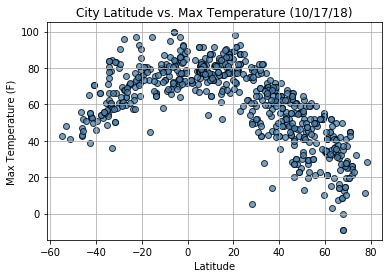

In [13]:
# Build scatter plot
lat_vs_temp = plt.scatter(lats, max_temps, color='steelblue', edgecolors='black', alpha=.75)

plt.title("City Latitude vs. Max Temperature (10/17/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#### Latitude vs. Humidity Plot

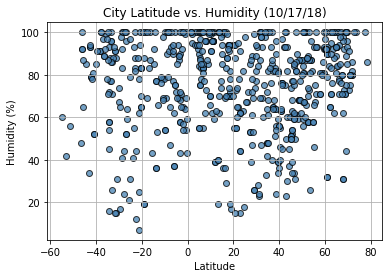

In [12]:
# Get humidity list
hums = all_cities['Humidity'].tolist()

#Plot humidity vs. latitude
lat_vs_hum = plt.scatter(lats, hums, color='steelblue', edgecolors='black', alpha=.75)

plt.title("City Latitude vs. Humidity (10/17/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

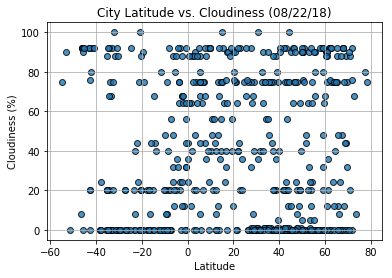

In [8]:
# Get list for Cloudiness per city
clouds = all_cities['Cloudiness'].tolist()

# Build Plot
lat_vs_temp = plt.scatter(lats, clouds, color='steelblue', edgecolors='black', alpha=.75)

plt.title("City Latitude vs. Cloudiness (10/17/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

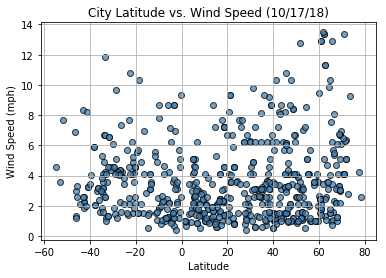

In [14]:
# Get list for Wind Speed per city
winds = all_cities['Wind Speed'].tolist()

# Build Plot
lat_vs_temp = plt.scatter(lats, winds, color='steelblue', edgecolors='black', alpha=.75)

plt.title("City Latitude vs. Wind Speed (10/17/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)